In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt

from transform_data import transform_data

## 1. Загрузка и преобразование данных

Данные загружаются из таблицы `datasets_popularity`. Таблица имеет следующие столбцы:

`datetime`,
`datasetname`,
`input_format_short`,
`input_format_desc`,
`input_project`,
`prod_step`,
`process_desc`,
`n_dataset`,
`tid`,
`process_tags`,
`n_tasks`,
`gshare`,
`username`,
`n_replicas`,
`jeditaskid`,
`creationdate`

На данном этапе рассматривается конкретная группа датасетов: DAOD,PHYS,mc16_13TeV. Загружаются только строки из таблицы, для которых:
```
input_format_short = 'DAOD'
input_format_desc = 'PHYS'
input_project = 'mc16_13TeV'
```

Возьмём две даты 2023-01-01 (`timestamp_cutoff`) и 2023-04-01 (`timestamp_horizon`). Смысл следующий: в момент времени "1 января 2023 года" хотим знать, какова будет популярность датасетов в ближайшие три месяца, т.е. в промежутке времени [2023-01-01, 2023-04-01] (или [`timestamp_cutoff`, `timestamp_horizon`]).

<b>Объектом</b> (элементом обучающей выборки) в задаче машинного обучения будет <b>датасет</b>. Признаками (множество $X$) могут являтся любые величины, выводимые из исторической информации, известной о датасете, до момента времени `timestamp_cutoff`. Популярность датасета в промежуток времени [`timestamp_cutoff`, `timestamp_horizon`] --- скрытое состояние (предсказываемая величина, ответ $y \in Y$).

Собственно, следующая функция (`transform_data`) загружает данные из csv-файла (которые были выгружены из таблицы `datasets_popularity`), формирует и возвращает `pandas.DataFrame` с обучающей выборкой.

На данном этапе в выходном датафрейме имеются следующие столбцы (признаки и ответ $y$):

- `n_users` (int) --- количество различных пользователей, которые обращались к датасету до момента времени `timestamp_cutoff`
- `n_accesses` (int) --- количество обращений к датасету до момента времени `timestamp_cutoff`,
- `n_access_days` (int) --- количество дней (различных дат) обращений к датасету до момента времени `timestamp_cutoff`,
- `last_date` (pandas.Timestamp) --- дата последнего обращения к датасету до момента времени `timestamp_cutoff`

- `y` (int) --- количество обращений к датасету в промежуток времени [`timestamp_cutoff`, `timestamp_horizon`]

In [2]:
objs_df = transform_data(
    timestamp_cutoff = pd.to_datetime('2023-01-01'),
    timestamp_horizon = pd.to_datetime('2023-04-01'),
    source_csv = '/home/mshubin/Desktop/datasets-popularity-task/' +
    'datasets_popularity_DAOD_PHYS_mc16_13TeV_202308141254.csv'
)

100%|██████████████████████████████████| 26726/26726 [00:01<00:00, 21571.48it/s]


In [3]:
objs_df.head()

,n_users,n_accesses,n_access_days,last_date,y
datasetname,,,,,
mc16_13TeV:mc16_13TeV.301040.PowhegPythia8EvtGen_AZNLOCTEQ6L1_DYtautau_120M180.deriv.DAOD_PHYS.e3649_e5984_s3126_r10724_r10726_p5001_tid28878556_00,4,13,13,2022-12-26,8
mc16_13TeV:mc16_13TeV.301040.PowhegPythia8EvtGen_AZNLOCTEQ6L1_DYtautau_120M180.deriv.DAOD_PHYS.e3649_s3126_r10201_r10210_p5001_tid28878819_00,4,12,12,2022-12-27,7
mc16_13TeV:mc16_13TeV.301040.PowhegPythia8EvtGen_AZNLOCTEQ6L1_DYtautau_120M180.deriv.DAOD_PHYS.e3649_s3126_r9364_r9315_p5001_tid28878681_00,4,12,12,2022-12-28,9
mc16_13TeV:mc16_13TeV.301040.PowhegPythia8EvtGen_AZNLOCTEQ6L1_DYtautau_120M180.deriv.DAOD_PHYS.e3649_s3126_r9364_r9315_p5001_tid28878690_00,4,12,12,2022-12-28,9
mc16_13TeV:mc16_13TeV.301041.PowhegPythia8EvtGen_AZNLOCTEQ6L1_DYtautau_180M250.deriv.DAOD_PHYS.e3649_e5984_s3126_r10724_r10726_p5001_tid28878842_00,4,12,12,2022-12-26,8


## 2. Корреляция признаков с целевой переменной (y)

### Признак `n_users`

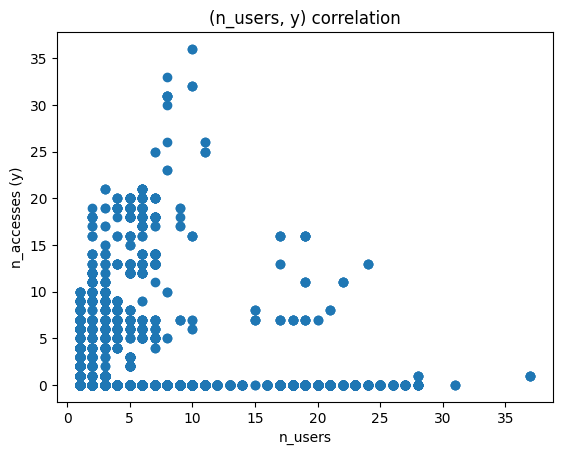

In [4]:
fig, ax = plt.subplots()
# fig.set(figwidth=8, figheight=3)
ax.set(xlabel='n_users', ylabel='n_accesses (y)',
       title='(n_users, y) correlation')

ax.plot(objs_df['n_users'], objs_df['y'], 'o') # label=''
# ax.legend()

#### Вывод:
Признак малоинформативен, потому что независимо от количества пользователей, датасет может оказаться как непопулярным в будущем ($y = 0$), так и популярным ($y > 0$)

### Признак `n_accesses`

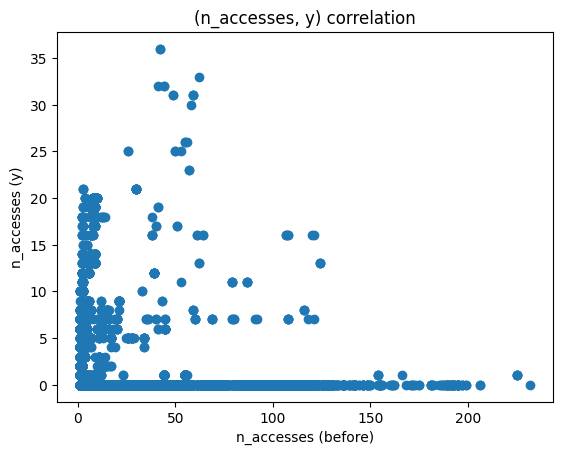

In [5]:
fig, ax = plt.subplots()

ax.set(xlabel='n_accesses (before)', ylabel='n_accesses (y)',
       title='(n_accesses, y) correlation')

ax.plot(objs_df['n_accesses'], objs_df['y'], 'o')

#### Вывод:
Аналогично предыдущему признаку

### Признак `n_access_days`

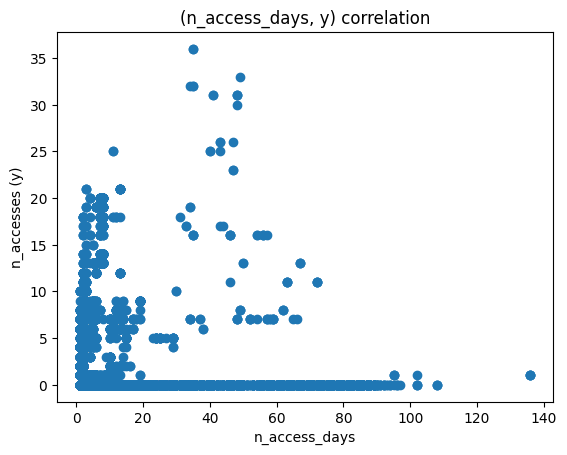

In [6]:
fig, ax = plt.subplots()

ax.set(xlabel='n_access_days', ylabel='n_accesses (y)',
       title='(n_access_days, y) correlation')

ax.plot(objs_df['n_access_days'], objs_df['y'], 'o')

#### Вывод:
И здесь та же проблема

### Признак `last_date`

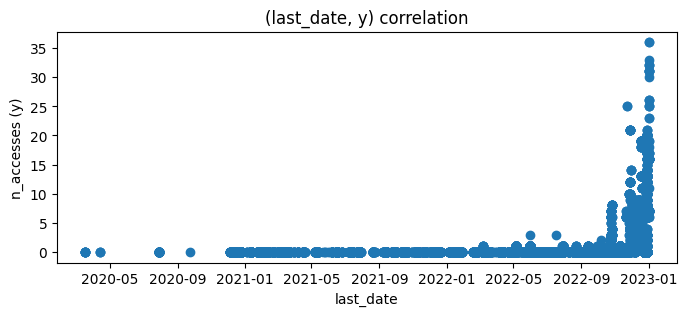

In [7]:
fig, ax = plt.subplots()
fig.set(figwidth=8, figheight=3)
ax.set(xlabel='last_date', ylabel='n_accesses (y)',
       title='(last_date, y) correlation')

ax.plot(objs_df['last_date'], objs_df['y'], 'o')

#### Вывод:

Датасеты, к которым последний раз обращались давно, с меньшей вероятностью будут популярны в будущем.

## 3. Карты пар признаков с классами

Отнесём датасеты, к которым нет обращений в будущем ($y = 0$) к "нулевому" классу.
А датасеты, к которым есть обращения в будущем ($y > 0$) к "положительному" классу.

In [8]:
objs_cl0 = objs_df[objs_df['y'] == 0]
objs_cl1 = objs_df[objs_df['y'] > 0]

Далее на графиках объекты положительного класса будем закрашивать в красный цвет.
А объекты нулевого класса --- в синий.

Всего 6 графиков (6 различных пар из 4-х признаков).

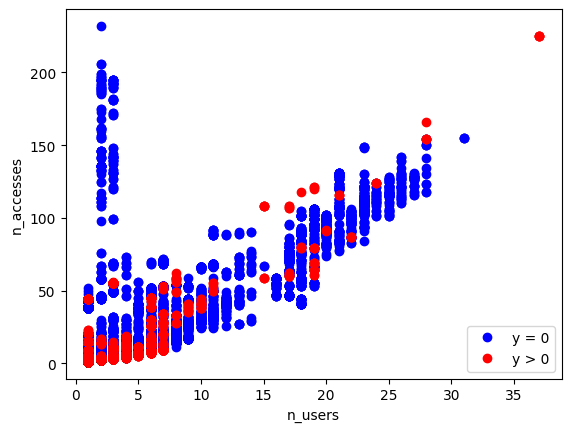

In [9]:
fig, ax = plt.subplots()

ax.set(xlabel='n_users', ylabel='n_accesses')

ax.plot(objs_cl0['n_users'], objs_cl0['n_accesses'], 'bo', label='y = 0')
ax.plot(objs_cl1['n_users'], objs_cl1['n_accesses'], 'ro', label='y > 0')
ax.legend()
# 


всё перемешано

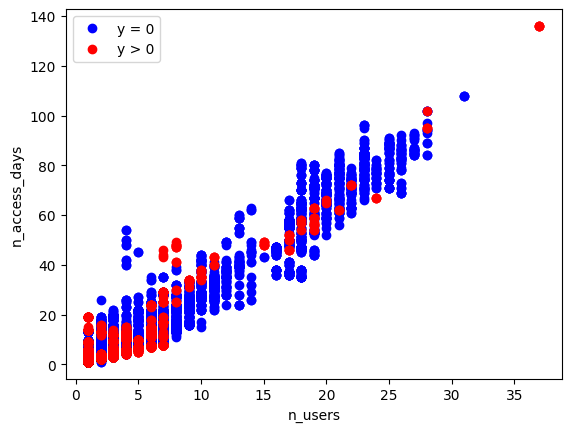

In [10]:
fig, ax = plt.subplots()

ax.set(xlabel='n_users', ylabel='n_access_days')

ax.plot(objs_cl0['n_users'], objs_cl0['n_access_days'], 'bo', label='y = 0')
ax.plot(objs_cl1['n_users'], objs_cl1['n_access_days'], 'ro', label='y > 0')
ax.legend()
# 

n_users и n_access_days --- коррелирующие признаки

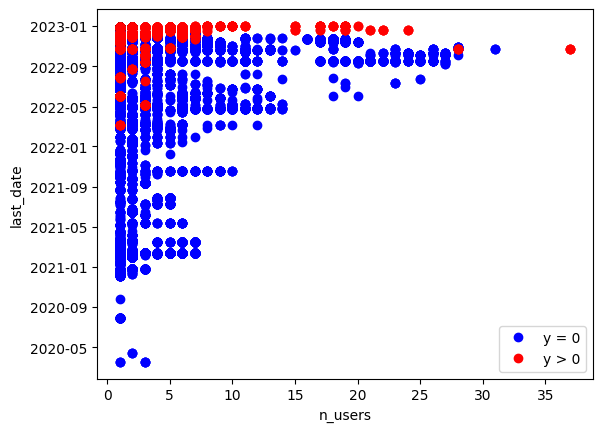

In [11]:
fig, ax = plt.subplots()

ax.set(xlabel='n_users', ylabel='last_date')

ax.plot(objs_cl0['n_users'], objs_cl0['last_date'], 'bo', label='y = 0')
ax.plot(objs_cl1['n_users'], objs_cl1['last_date'], 'ro', label='y > 0')
ax.legend()
# 

Положительный класс ярко выражен в углу, но поверх отрицательного

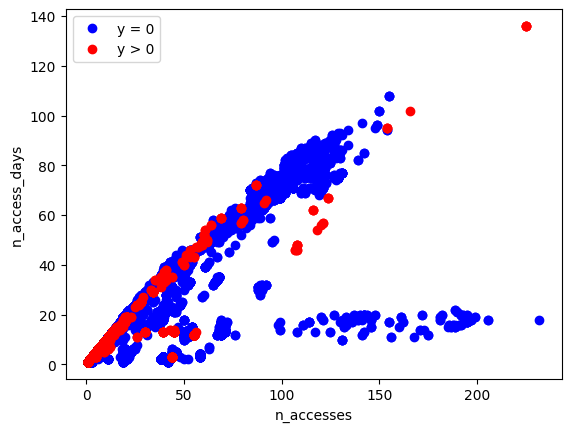

In [12]:
fig, ax = plt.subplots()

ax.set(xlabel='n_accesses', ylabel='n_access_days')

ax.plot(objs_cl0['n_accesses'], objs_cl0['n_access_days'], 'bo', label='y = 0')
ax.plot(objs_cl1['n_accesses'], objs_cl1['n_access_days'], 'ro', label='y > 0')
ax.legend()
# 

всё перемешано, коррелирующие признаки, однако есть кластер из отрицательных
элементов, который выпадает из корреляции

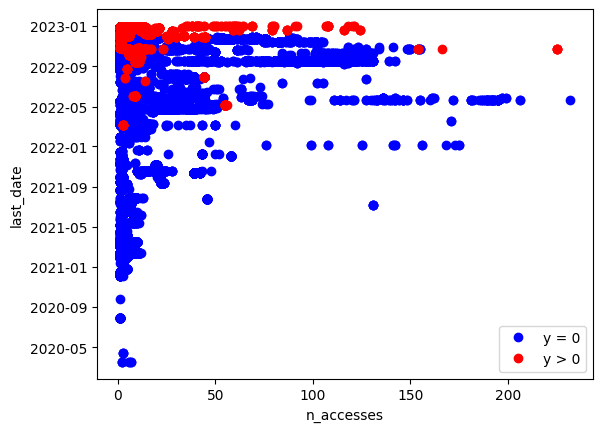

In [13]:
fig, ax = plt.subplots()

ax.set(xlabel='n_accesses', ylabel='last_date')

ax.plot(objs_cl0['n_accesses'], objs_cl0['last_date'], 'bo', label='y = 0')
ax.plot(objs_cl1['n_accesses'], objs_cl1['last_date'], 'ro', label='y > 0')
ax.legend()
# 

Положительный класс ярко выражен в углу, но поверх отрицательного

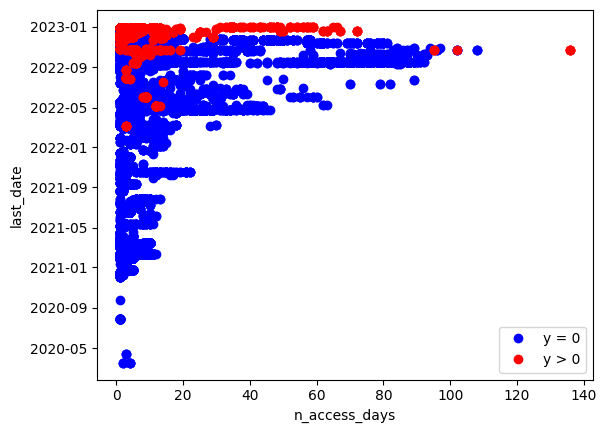

In [14]:
fig, ax = plt.subplots()

ax.set(xlabel='n_access_days', ylabel='last_date')

ax.plot(objs_cl0['n_access_days'], objs_cl0['last_date'], 'bo', label='y = 0')
ax.plot(objs_cl1['n_access_days'], objs_cl1['last_date'], 'ro', label='y > 0')
ax.legend()

Положительный класс ярко выражен в углу, но поверх отрицательного

#### Выводы:

Пока не удалось найти пару признаков такую, чтобы на плоскости удалось разделить классы. Однако в 4-х мерном пространстве всех 4-х признаков такая разделимость может иметь место

## 4. Применение модели sklearn.svm.SVC для задачи классификации

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# RESULTS (WITH FILTERING):

# accuracy (bin) = 0.6951489780842157
# accuracy (multi) = 0.6425757202659443
# precision (for positive class) = 0.15820674323823639
# recall (for positive class) = 0.6767036450079239
# F1-score = 0.2564564564564564


Возьмём в качестве обучающей выборки данные с параметрами:
- `timestamp_cutoff = 2022-10-01`
- `timestamp_horizon = 2022-12-31`

Т.е. предсказание относительно момента времени "1 октября 2022 года" популярности в ближайшие 3 месяца.

А в качестве тестовой выборки возьмём данные с параметрами:
- `timestamp_cutoff = 2023-01-01`
- `timestamp_horizon = 2023-04-01`

In [16]:
objs_df_train = transform_data(
    timestamp_cutoff = pd.to_datetime('2022-10-01'),
    timestamp_horizon = pd.to_datetime('2022-12-31'),
    source_csv = '/home/mshubin/Desktop/datasets-popularity-task/' +
    'datasets_popularity_DAOD_PHYS_mc16_13TeV_202308141254.csv'
)

objs_df_test = transform_data(
    timestamp_cutoff = pd.to_datetime('2023-01-01'),
    timestamp_horizon = pd.to_datetime('2023-04-01'),
    source_csv = '/home/mshubin/Desktop/datasets-popularity-task/' +
    'datasets_popularity_DAOD_PHYS_mc16_13TeV_202308141254.csv'
)

100%|██████████████████████████████████| 26726/26726 [00:01<00:00, 22255.10it/s]


Поскольку модель sklearn.svm.SVC работает только с числовыми признаками, необходимо преобразовать тип `pd.Timestamp` (признак `last_date`) к числу. Сделаем это путём вычитания даты (заведомо меньшей всех временных меток в наших данных) и из полученной `pd.Timedelta` вычленим количество дней, получив целое число (`int`).

In [17]:
last_dates_relative = objs_df_train['last_date'] - pd.Timestamp(2010, 1, 1)
objs_df_train['last_date'] = last_dates_relative.apply(getattr, args=('days',))

last_dates_relative = objs_df_test['last_date'] - pd.Timestamp(2010, 1, 1)
objs_df_test['last_date'] = last_dates_relative.apply(getattr, args=('days',))

#### Обучение и предсказание

В данном случае у нас целевая переменная `y` (количество обращений в будущие 3 месяца) --- это целое число. На практике принимает небольшие значения, максимальное 36.

Модель рассматривает эту задачу, как задачу многоклассовой классификации (36 классов).

Но показатели качества приведём для бинарной классификации (насколько модель правильно предсказывает событие $y > 0$)

In [18]:
X_train = objs_df_train.drop('y', axis='columns').to_numpy()
y_train = objs_df_train['y'].to_numpy()

X_test = objs_df_test.drop('y', axis='columns').to_numpy()
y_test = objs_df_test['y'].to_numpy()

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=42))

print('fiting started', time.strftime('%Y-%m-%d %H:%M:%S'))
a = clf.fit(X_train, y_train)
print('fiting finished', time.strftime('%Y-%m-%d %H:%M:%S'))

y_pred = clf.predict(X_test)
print('prediction finished', time.strftime('%Y-%m-%d %H:%M:%S'))

print('accuracy (bin) =', np.mean(np.sign(y_pred) == np.sign(y_test)))
print('accuracy (multi) =', np.mean(y_pred == y_test))


precision1 = np.sum((y_pred > 0) & (y_test > 0)) / np.sum(y_pred > 0)
recall1 = np.sum((y_pred > 0) & (y_test > 0)) / np.sum(y_test > 0)

print('precision (for positive class) =', precision1)
print('recall (for positive class) =', recall1)
print('F1-score =', 2.0 / (1.0 / precision1 + 1.0 / recall1) )

fiting started 2023-09-21 16:07:00
fiting finished 2023-09-21 16:07:05
prediction finished 2023-09-21 16:07:16
accuracy (bin) = 0.8160592681284142
accuracy (multi) = 0.7721694230337499
precision (for positive class) = 0.32202477113624123
recall (for positive class) = 0.3327768503060657
F1-score = 0.3273125342090859


### То же самое, но с использованием фильтрации датасетов в обучающей выборке

Выкинем из обучающей и тестовой выборок датасеты, к которым было 10 или меньше обращений.

In [19]:
objs_df_train = objs_df_train[objs_df_train['n_accesses'] > 10]
objs_df_test = objs_df_test[objs_df_test['n_accesses'] > 10]

X_train = objs_df_train.drop('y', axis='columns').to_numpy()
y_train = objs_df_train['y'].to_numpy()

X_test = objs_df_test.drop('y', axis='columns').to_numpy()
y_test = objs_df_test['y'].to_numpy()

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=42))

print('fiting started', time.strftime('%Y-%m-%d %H:%M:%S'))
a = clf.fit(X_train, y_train)
print('fiting finished', time.strftime('%Y-%m-%d %H:%M:%S'))

y_pred = clf.predict(X_test)
print('prediction finished', time.strftime('%Y-%m-%d %H:%M:%S'))

print('accuracy (bin) =', np.mean(np.sign(y_pred) == np.sign(y_test)))
print('accuracy (multi) =', np.mean(y_pred == y_test))


precision1 = np.sum((y_pred > 0) & (y_test > 0)) / np.sum(y_pred > 0)
recall1 = np.sum((y_pred > 0) & (y_test > 0)) / np.sum(y_test > 0)

print('precision (for positive class) =', precision1)
print('recall (for positive class) =', recall1)
print('F1-score =', 2.0 / (1.0 / precision1 + 1.0 / recall1) )

fiting started 2023-09-21 16:07:16
fiting finished 2023-09-21 16:07:17
prediction finished 2023-09-21 16:07:18
accuracy (bin) = 0.6951489780842157
accuracy (multi) = 0.6425757202659443
precision (for positive class) = 0.15820674323823639
recall (for positive class) = 0.6767036450079239
F1-score = 0.2564564564564564
